# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
df['reason'].value_counts().head() # gets the most frequent occuring elements in this series, a column in a dataFrame is a series

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

(0.0, 50000.0)

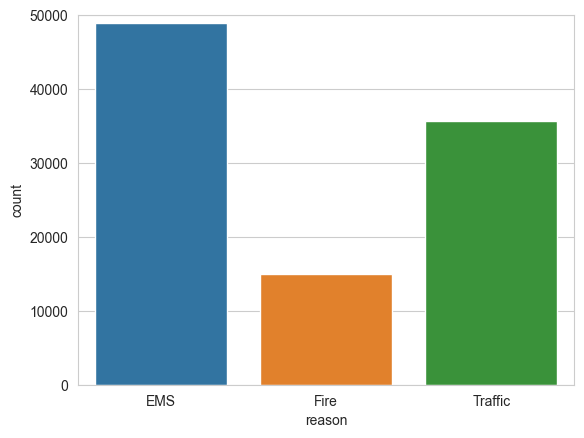

In [11]:
import  seaborn as sns
sns.set_style('whitegrid')
sns.countplot(data=df, x='reason')
ax = plt.gca()
ax.set_ylim([0, 50000])

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [12]:
type( df['timeStamp'].iloc[0] ) # get the value in the 0 index of the TimeStamp Column

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [13]:
df['timeStamp'] = df['timeStamp'].apply(pd.to_datetime)

In [14]:
time = df['timeStamp'].iloc[0]
time.hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [15]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayOfWeek'] = df['timeStamp'].apply(lambda time: time.day_of_week)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayOfWeek'] = df['dayOfWeek'].map(dmap)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

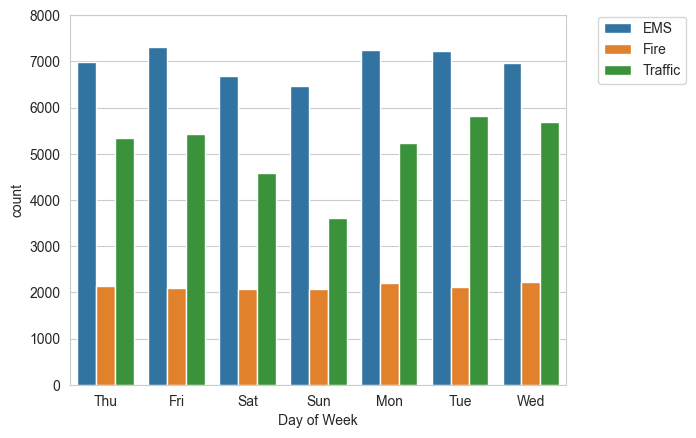

In [17]:
sns.countplot(data=df, x='dayOfWeek', hue='reason')

ax = plt.gca()
ax.set_ylim([0, 8000])
ax.set_xlabel('Day of Week')

plt.legend(loc='upper left', bbox_to_anchor=(1.05,1.015))

**Now do the same for Month:**

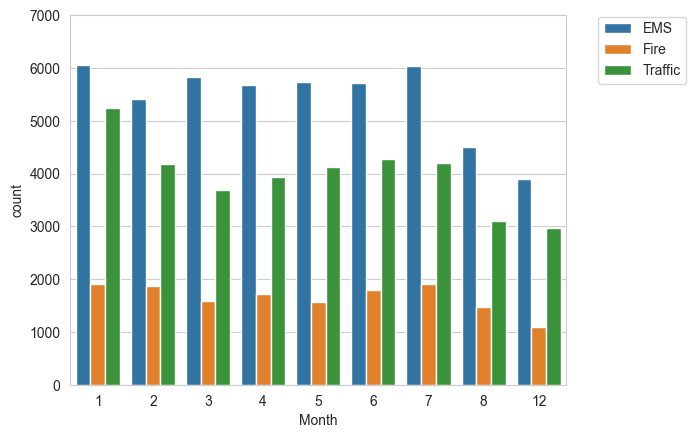

In [18]:
sns.countplot(data=df, x='month', hue='reason')

ax = plt.gca()
ax.set_ylim([0, 7000])
ax.set_xlabel('Month')

plt.legend(loc='upper left', bbox_to_anchor=(1.05,1.015))

**It is missing some months! 9,10, and 11 are not there.**

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [19]:
df.groupby('month').count().reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayOfWeek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

Text(0.5, 0, 'Month')

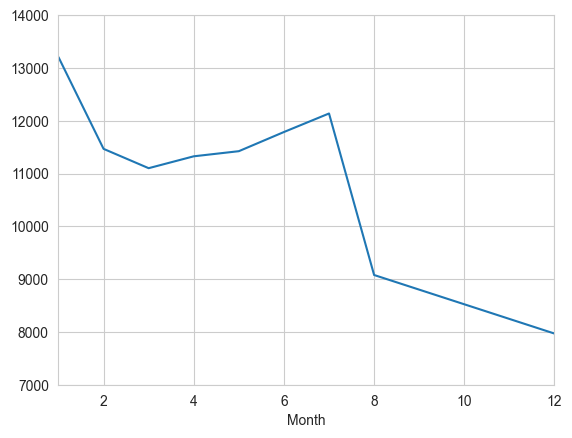

In [20]:
months_df = df.groupby('month').count()
months_df['dayOfWeek'].plot()
ax = plt.gca()
ax.set_xlim([1, 12])
ax.set_ylim([7000, 14000])
ax.set_xlabel('Month')

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

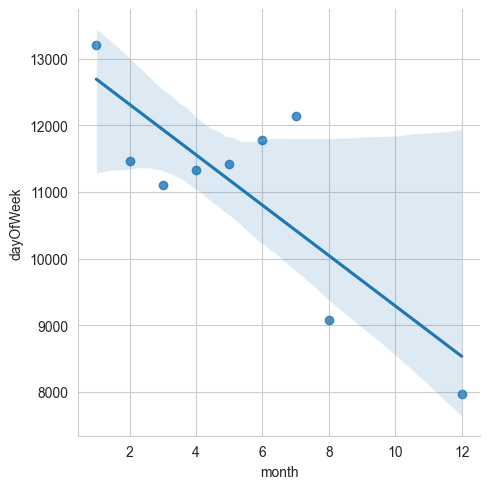

In [21]:
months_df = months_df.reset_index()
sns.lmplot(data=months_df, x='month', y='dayOfWeek')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [22]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

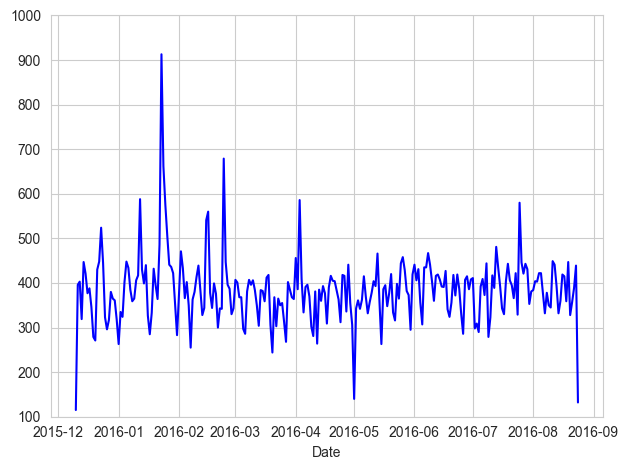

In [23]:
byDate = df.groupby(by='Date').count()['lat'].plot(color='blue')

ax = plt.gca()
ax.set_ylim([100, 1000])
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

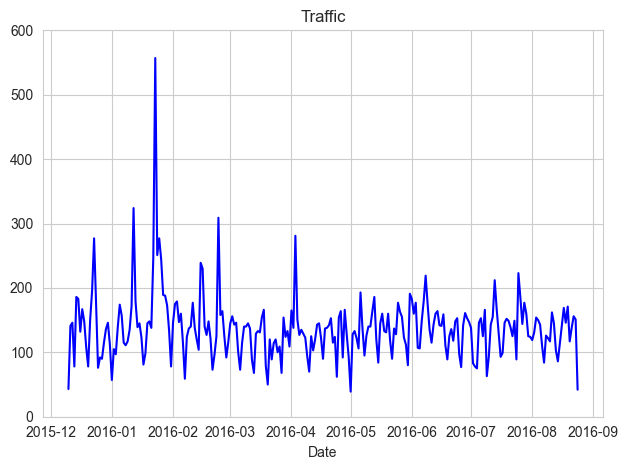

In [24]:
byDate = df[ df['reason'] == 'Traffic' ].groupby(by='Date').count()
byDate['lat'].plot(color='blue')

ax = plt.gca()
ax.set_ylim([0, 600])
ax.set_title('Traffic')
plt.tight_layout()

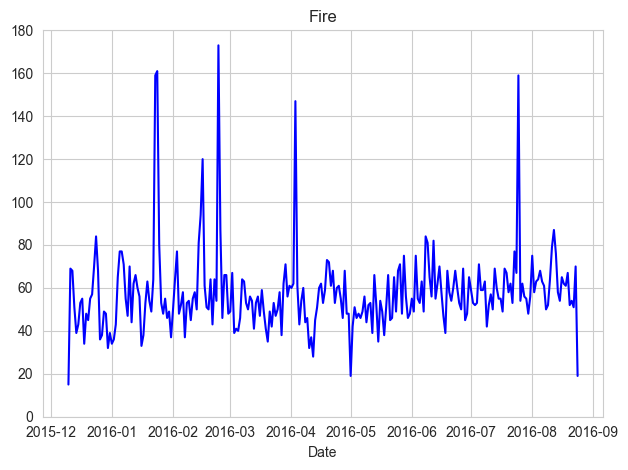

In [25]:
byDate = df[df['reason'] == 'Fire'].groupby(by='Date').count()
byDate['lat'].plot(color='blue')

ax = plt.gca()
ax.set_ylim([0, 180])
ax.set_title('Fire')
plt.tight_layout()


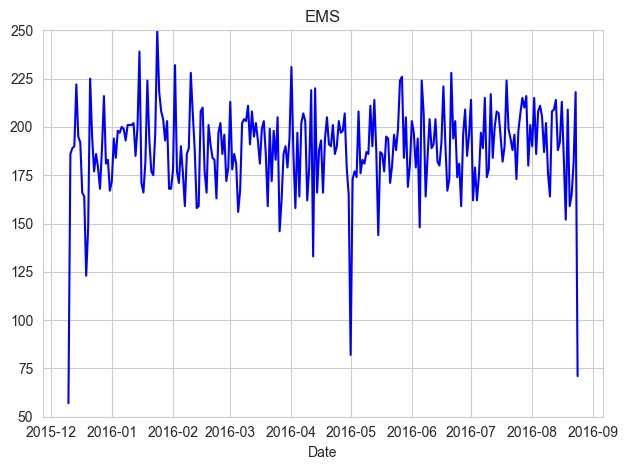

In [26]:
byDate = df[df['reason'] == 'EMS'].groupby(by='Date').count()
byDate['lat'].plot(color='blue')

ax = plt.gca()
ax.set_ylim([50, 250])
ax.set_title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [27]:
dayHour = df.groupby(by=['dayOfWeek', 'hour']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

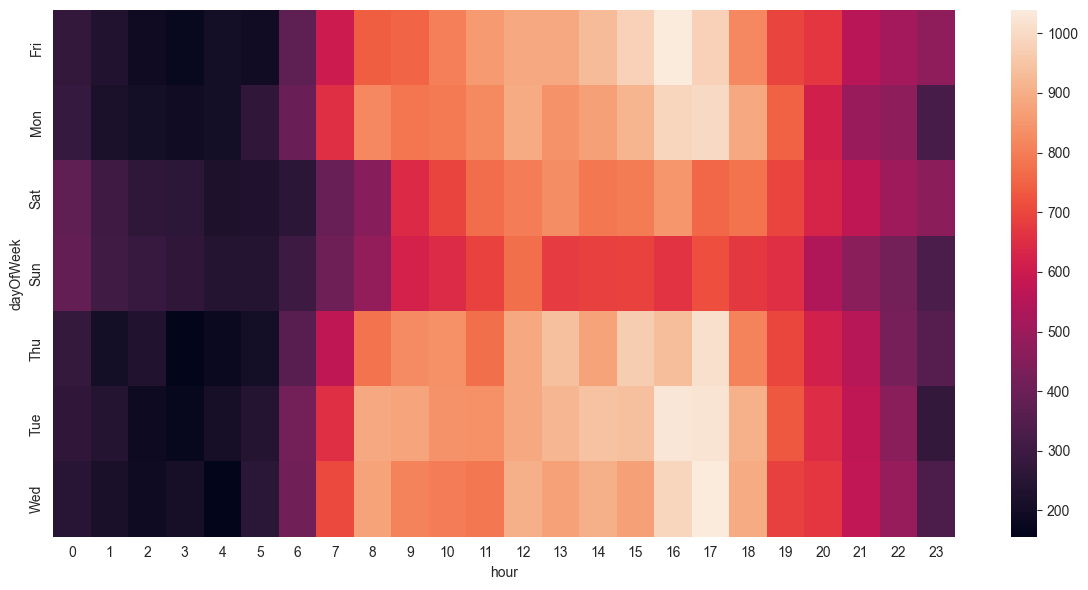

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=dayHour)
plt.tight_layout()

** Now create a clustermap using this DataFrame. **

<Figure size 1200x600 with 0 Axes>

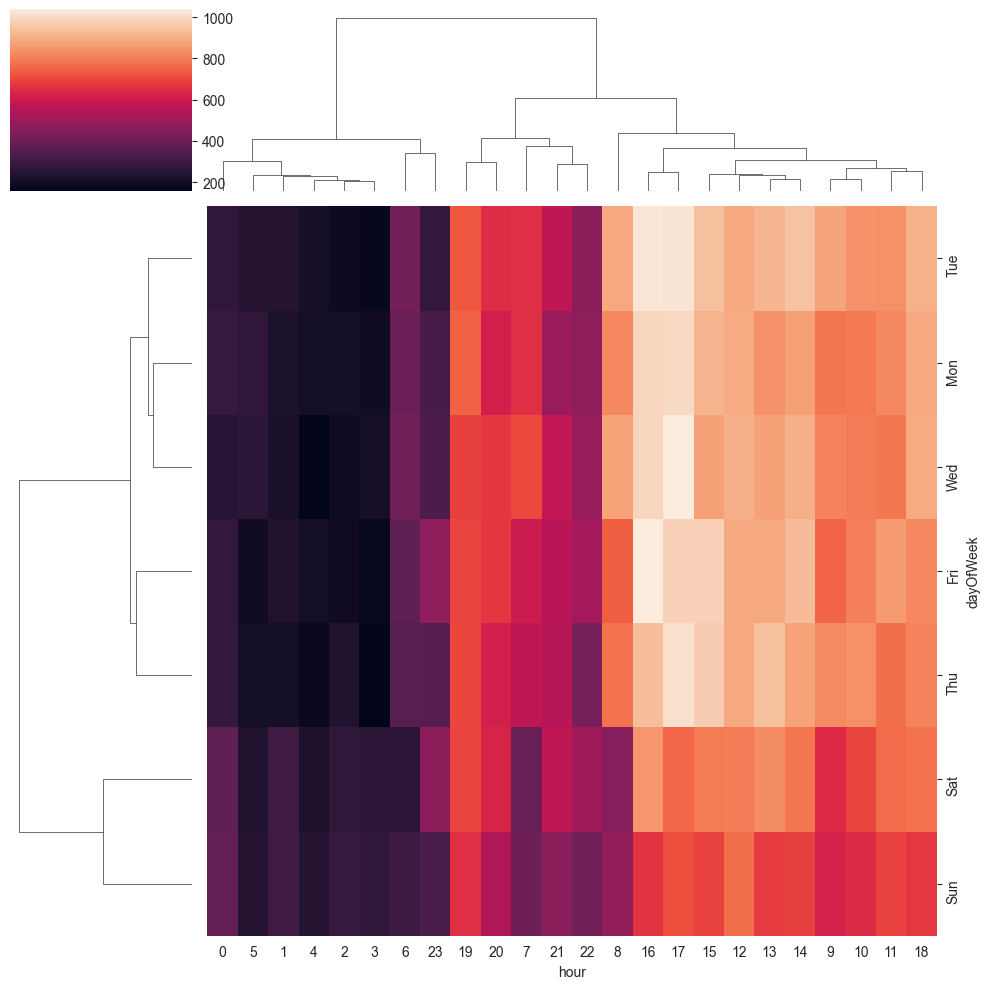

In [29]:
plt.figure(figsize=(12, 6))
sns.clustermap(data=dayHour)
plt.tight_layout()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [30]:
dayMonth = df.groupby(by=['dayOfWeek', 'month']).count()['reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
dayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


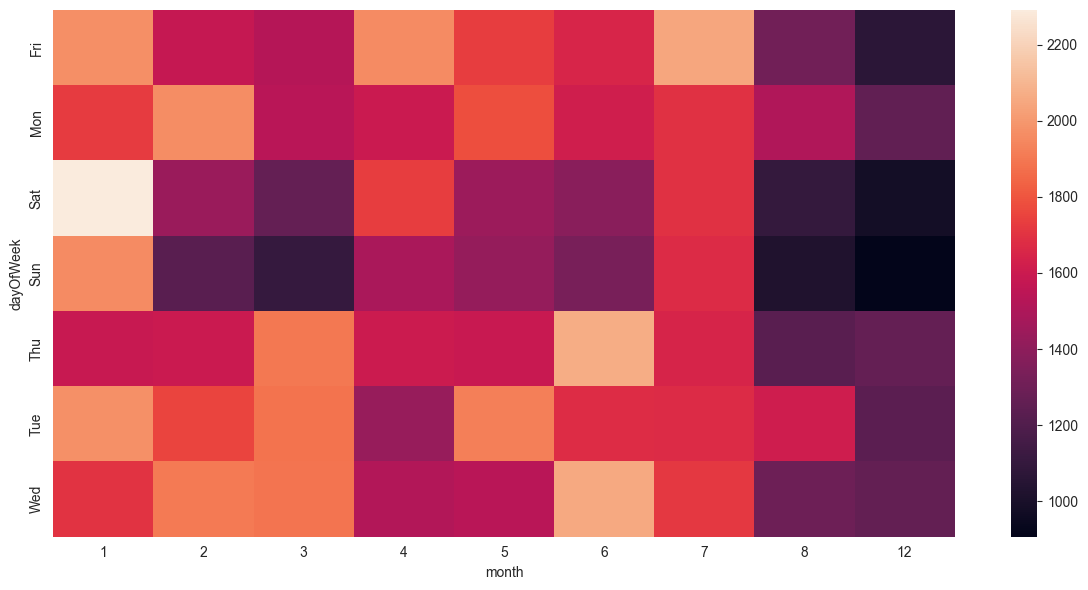

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=dayMonth)
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

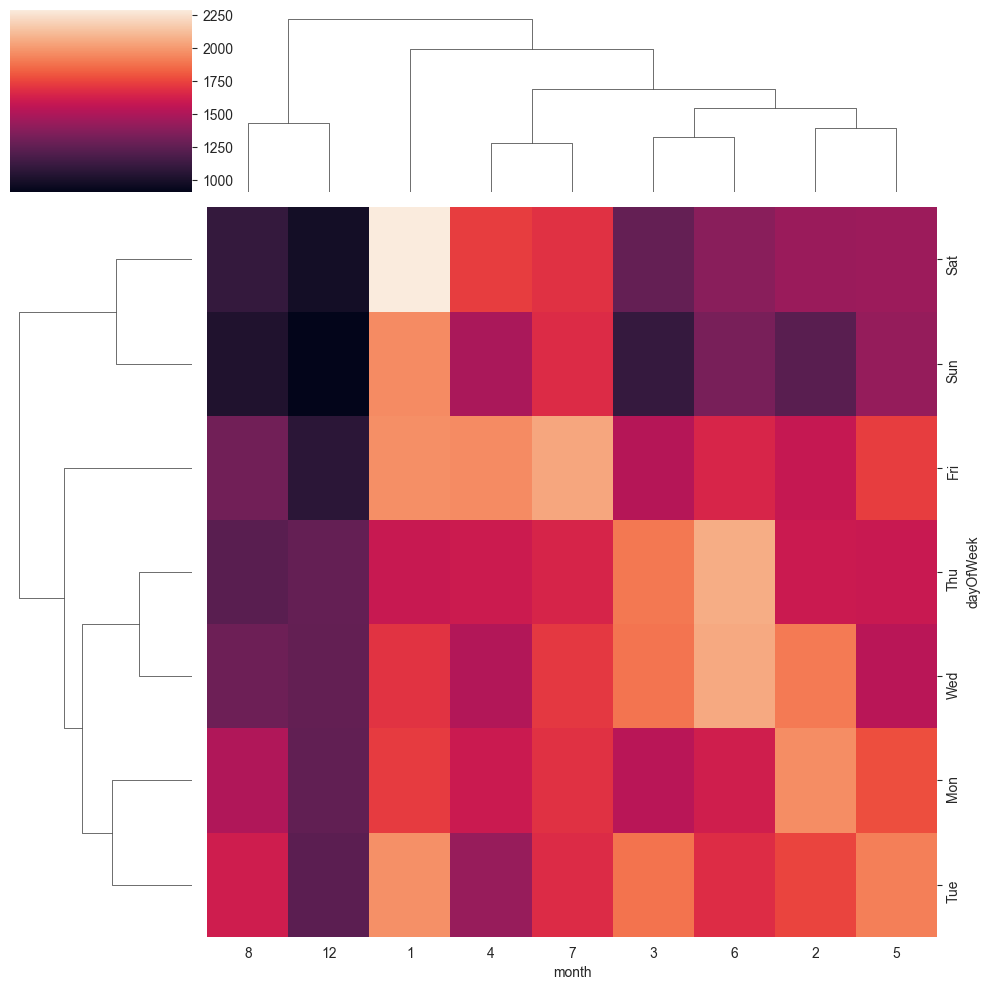

In [32]:
plt.figure(figsize=(12, 6))
sns.clustermap(data=dayMonth)
plt.tight_layout()

**Continue exploring the Data however you see fit!**
# Great Job!

In [33]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


## Examining the Address That Made the Most 911 Calls

### Finding the Address That Made the Most 911 Calls

In [34]:
df['addr'].value_counts()

SHANNONDELL DR & SHANNONDELL BLVD      938
MAIN ST & OLD SUMNEYTOWN PIKE          390
THE FAIRWAY  & RYDAL RD                260
GULPH RD & KIRK AVE                    235
EVERGREEN RD & W LIGHTCAP RD           232
                                      ... 
CREEKVIEW DR & OLD PENLLYN PIKE          1
OLD GULPH RD & MONTGOMERY SCHOOL LN      1
ROMANO DR & BELVOIR RD                   1
CHERRY LN & RYDAL RD                     1
PARK DR & N ADAMS ST                     1
Name: addr, Length: 21914, dtype: int64

### Graphing the 911 Calls From Shannondell Dr & Blvd During the Months

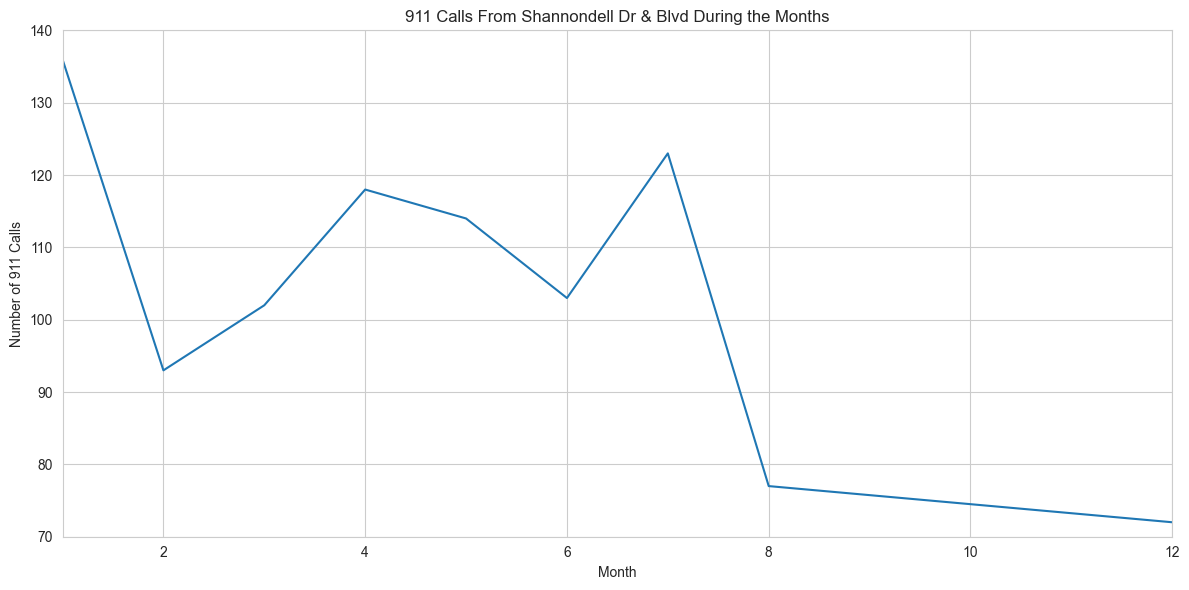

In [35]:
shannondell = df[df['addr'] == 'SHANNONDELL DR & SHANNONDELL BLVD']
shannondellByDate = shannondell.groupby(by='month').count()['lat']

plt.figure(figsize=(12, 6))
shannondellByDate.plot.line(x='month')

axes = plt.gca()
axes.set_title('911 Calls From Shannondell Dr & Blvd During the Months')
axes.set_ylabel('Number of 911 Calls')
axes.set_xlabel('Month')
axes.set_xlim([1, 12])
axes.set_ylim([70, 140])
plt.tight_layout()

#### Examining the Months with the Most Calls

In [36]:
sdTopFiveMonths = shannondell['month'].value_counts().head(5).index
sdTopFiveMonths

Int64Index([1, 7, 4, 5, 6], dtype='int64')

#### What Type of 911 Call were the biggest in the Top 3 Months

In [37]:
sdJanuary = shannondell[shannondell['month'] == sdTopFiveMonths[0]]
sdJanuary['reason'].value_counts()

EMS     135
Fire      1
Name: reason, dtype: int64

In [38]:
sdJuly = shannondell[shannondell['month'] == sdTopFiveMonths[1]]
sdJuly['reason'].value_counts()

EMS     119
Fire      4
Name: reason, dtype: int64

In [39]:
sdApril = shannondell[shannondell['month'] == sdTopFiveMonths[2]]
sdApril['reason'].value_counts()

EMS     114
Fire      4
Name: reason, dtype: int64

##### What type of EMS were the Most Common in January

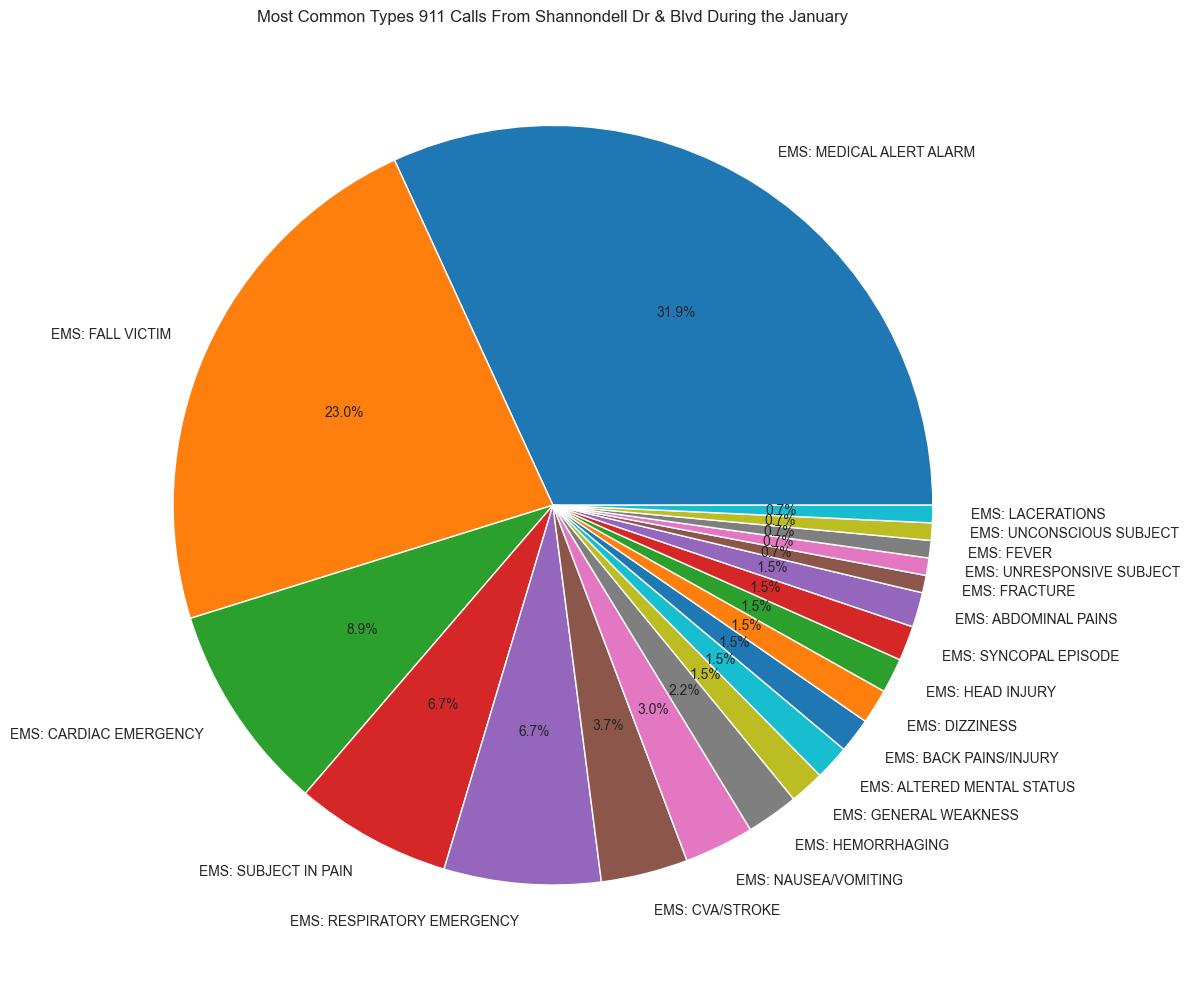

In [40]:
sdJanuaryReasons = sdJanuary[ sdJanuary['reason'] == 'EMS']['title'].value_counts()

plt.figure(figsize=(15, 10))
sdJanuaryReasons.plot.pie(autopct='%1.1f%%')

axes = plt.gca()
axes.set_title('Most Common Types 911 Calls From Shannondell Dr & Blvd During the January')
axes.set_ylabel('')
plt.tight_layout()

#### Is there a Correaltion between EMS and Date in Shannondell

Creating the pivot table

In [41]:
pvSdMonthTitle = shannondell.groupby(by=['month', 'title']).count()['lat'].unstack()
pvSdMonthTitle

title,EMS: ABDOMINAL PAINS,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: BACK PAINS/INJURY,EMS: CARDIAC ARREST,EMS: CARDIAC EMERGENCY,EMS: CHOKING,EMS: CVA/STROKE,EMS: DEHYDRATION,EMS: DIZZINESS,...,EMS: RESPIRATORY EMERGENCY,EMS: SEIZURES,EMS: SUBJECT IN PAIN,EMS: SYNCOPAL EPISODE,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNRESPONSIVE SUBJECT,Fire: FIRE ALARM,Fire: FIRE INVESTIGATION,Fire: S/B AT HELICOPTER LANDING
month,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,2.0,2.0,NaN,12.0,NaN,5.0,NaN,2.0,...,9.0,NaN,9.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN
2,2.0,NaN,2.0,1.0,NaN,10.0,NaN,2.0,NaN,1.0,...,7.0,NaN,3.0,NaN,NaN,1.0,3.0,3.0,1.0,NaN
3,1.0,NaN,6.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,...,13.0,NaN,2.0,NaN,1.0,1.0,NaN,3.0,NaN,1.0
4,NaN,NaN,3.0,1.0,NaN,11.0,NaN,3.0,NaN,NaN,...,11.0,NaN,4.0,3.0,NaN,4.0,NaN,4.0,NaN,NaN
5,5.0,NaN,1.0,3.0,NaN,7.0,1.0,1.0,1.0,NaN,...,9.0,NaN,4.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN
6,1.0,1.0,3.0,1.0,1.0,5.0,NaN,4.0,NaN,NaN,...,4.0,NaN,4.0,1.0,1.0,4.0,NaN,1.0,NaN,NaN
7,1.0,NaN,8.0,NaN,1.0,11.0,NaN,5.0,NaN,NaN,...,11.0,1.0,7.0,NaN,1.0,1.0,1.0,3.0,1.0,NaN
8,NaN,NaN,1.0,3.0,NaN,8.0,NaN,3.0,NaN,2.0,...,7.0,NaN,1.0,NaN,3.0,2.0,1.0,1.0,NaN,NaN
12,2.0,NaN,5.0,1.0,NaN,8.0,NaN,2.0,NaN,1.0,...,4.0,2.0,5.0,NaN,NaN,2.0,1.0,3.0,NaN,NaN


In [42]:
pvSdMonthTitle.fillna(value=0, inplace=True)

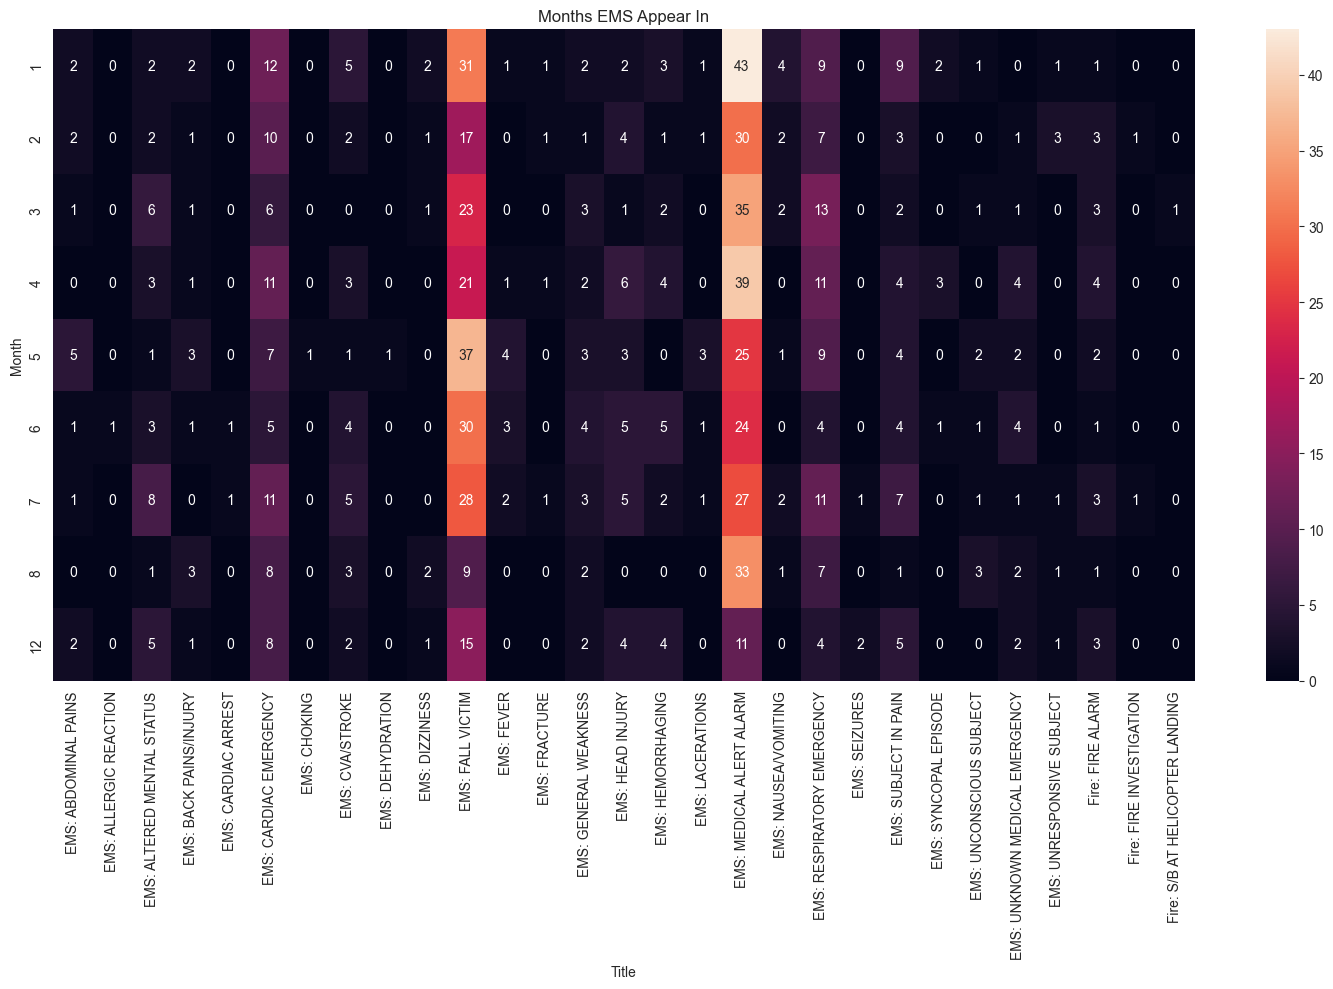

In [43]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=pvSdMonthTitle, annot=True)

axes = plt.gca()
axes.set_title('Months EMS Appear In')
axes.set_ylabel('Month')
axes.set_xlabel('Title')
plt.tight_layout()

##### Zooming in on the top 3 EMS reasons

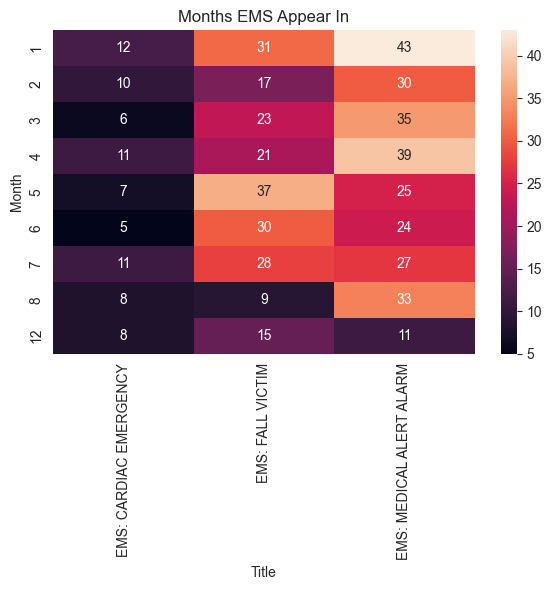

In [44]:
sdTop3Reasons = shannondell[(shannondell['title'] == 'EMS: CARDIAC EMERGENCY') |
            (shannondell['title'] == 'EMS: FALL VICTIM') | 
            (shannondell['title'] == 'EMS: MEDICAL ALERT ALARM')]

pvsdTop3ReasonsMonthTitle = sdTop3Reasons.groupby(
    by=['month', 'title']).count()['lat'].unstack()
pvsdTop3ReasonsMonthTitle

plt.figure(figsize=(6, 6))
sns.heatmap(data=pvsdTop3ReasonsMonthTitle, annot=True)

axes = plt.gca()
axes.set_title('Months EMS Appear In')
axes.set_ylabel('Month')
axes.set_xlabel('Title')
plt.tight_layout()